<a href="https://colab.research.google.com/github/iam-pattan/DL/blob/master/tensorly_mxnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorly

     |████████████████████████████████| 112kB 7.1MB/s 
     |████████████████████████████████| 163kB 21.2MB/s 
  Created wheel for tensorly: filename=tensorly-0.5.1-cp37-none-any.whl size=149171 sha256=9c3906ab154f26e00a46baf0f5fe595e3c0d564d83f6527733940cc23a15d652
  Stored in directory: /root/.cache/pip/wheels/88/1e/e7/b9677b2046cc87e17931b4b5781941786d3ee647825ca40ea6
Successfully built tensorly


In [ ]:
import tensorly as tl
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.misc import face

In [ ]:
img = face(gray=True)
img = tl.tensor(img / 255)

unfolding = tl.unfold(img, mode=0)
U, S, V = tl.partial_svd(unfolding, n_eigenvecs=30)

In [ ]:
U.shape, S.shape, V.shape

(torch.Size([768, 30]), torch.Size([30]), torch.Size([30, 1024]))

In [ ]:
comp = (U @ tl.diag(S) @ V)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fcd16fd2c90>,
 <matplotlib.image.AxesImage at 0x7fcd16f55850>)

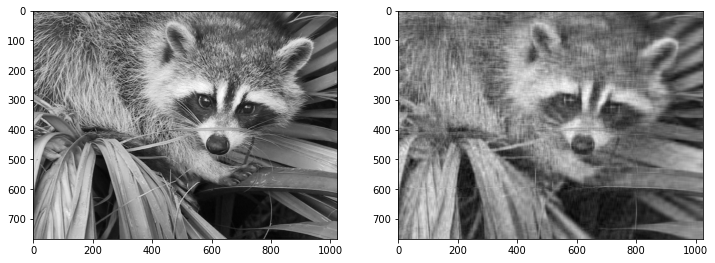

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(comp, cmap='gray')

In [ ]:
plt.imsave('/content/original.png', img)
plt.imsave('/content/compressed.png',comp)

In [ ]:
image = np.array(comp) 
type(image)

numpy.ndarray

Text(0.5, 1.0, 'Bilateral')

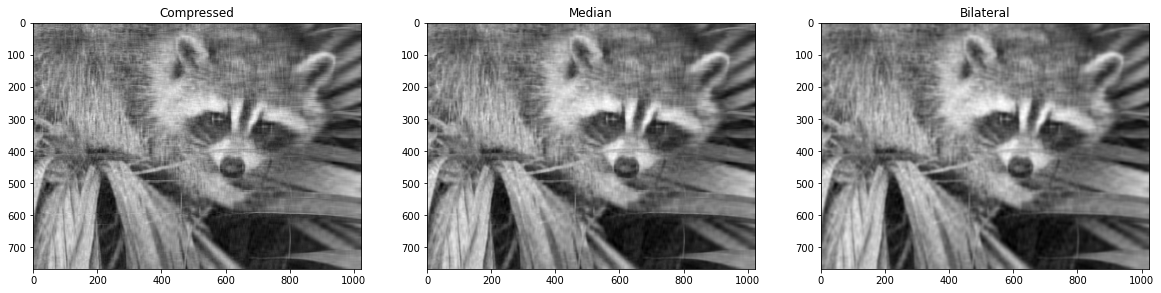

In [ ]:
blur = cv2.bilateralFilter(image,9,75,75)
median = cv2.medianBlur(image,5)

plt.rcParams['figure.figsize'] = (20,12)
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Compressed')
plt.subplot(132), plt.imshow(median, cmap='gray')
plt.title('Median')
plt.subplot(133), plt.imshow(blur, cmap='gray')
plt.title('Bilateral')

Ichata colour img try cheyyabadunu

In [ ]:
img1 = face(gray=False)
x,y,z =[],[],[]
for i in range(3):
  img = img1[:,:,i]
  img = tl.tensor(img / 255)

  unfolding = tl.unfold(img, mode=0)
  U, S, V = tl.partial_svd(unfolding, n_eigenvecs=30)
  x.append(U), y.append(S), z.append(V)

In [ ]:
x[0].shape

torch.Size([768, 30])

In [ ]:
comp = []
for i in range(3):
  abc = (x[i] @ tl.diag(y[i]) @ z[i])
  comp.append(abc)

In [ ]:
rgb = np.dstack((comp[0],comp[1],comp[2]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.axes._subplots.AxesSubplot at 0x7fcd16d530d0>,
 <matplotlib.image.AxesImage at 0x7fcd16d2ec50>)

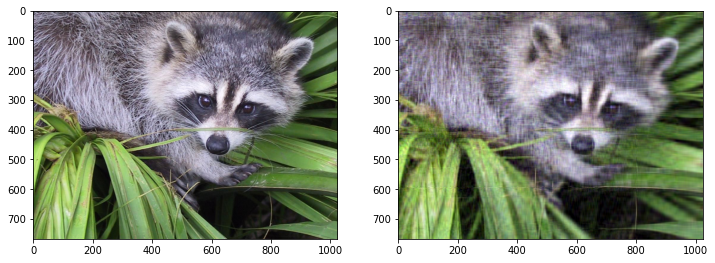

In [ ]:
plt.subplot(121), plt.imshow(img1)
plt.subplot(122), plt.imshow(rgb)

In [ ]:
!pip install mxnet

     |████████████████████████████████| 54.7MB 72kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
